<a href="https://colab.research.google.com/github/thaiinaaalves/II_analise_dados_programaria_nocoes_basicas_estatistica/blob/main/II_analise_dados_programaria_nocoes_basicas_estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

nocoes_basicas_estatistica_outliers_distribuicao_amostral_intervalo_confianca_featuring_engineering

In [ ]:
#configurando o códiigo para acessar a base de dados pelo drive, e instalando os pacotes necessários
from google.colab import drive
drive.mount('/content/drive')
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Currículo/planilha_modulo3 (1).xlsx")

In [ ]:
df

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0
4269,4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Indústria,de 1.001 a 3.000,0.0,NaN,Outra Opção,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0


In [ ]:
#criando uma lista
lista_idades=[26,30,32,22,26,35,35,40,20,43,31,23]

In [ ]:
#extraindo a média
np.mean(lista_idades)

30.25

In [ ]:
#criando a função media
media=np.mean(lista_idades)
print(f'A média é {media}')

A média é 30.25


In [ ]:
#ordenando a lista com a função sort
lista_idades.sort()
lista_idades

[20, 22, 23, 26, 26, 30, 31, 32, 35, 35, 40, 43]

In [ ]:
#extraindo a mediana
mediana=np.median(lista_idades)
print(f'A mediana é {mediana}')

A mediana é 30.5


In [ ]:
#é o valor central dos dados. É calculada pela soma de todos os valores e divisão pela quantidade de valores.
df['IDADE'].mean()

31.169168453657374

In [ ]:
#é o valor central dos dados ordenados. Menos afetada por valores extremos 'outliers'
df['IDADE'].median()

30.0

In [ ]:
#é o valor que aparece mais frequentemente nos dados.
df['IDADE'].mode()

,IDADE
0,27.0


In [ ]:
#Mede a dispersão dos dados em relação à média. Ou seja, quanto mais próximos de zero mais homogênio são os dados
df['IDADE'].std()

6.902802832143141

In [ ]:
df['IDADE'].min()

18.0

In [ ]:
df['IDADE'].max()

54.0

In [ ]:
#associação da media de genero/idade
df[df['GENERO']=='Feminino']['IDADE'].mean()

31.318051575931232

In [ ]:
df[df['GENERO']=='Masculino']['IDADE'].mean()

31.147876077930373

In [ ]:
#associação da media de genero/salário
df[df['GENERO']=='Feminino']['SALARIO'].mean()

8673.22460496614

In [ ]:
df[df['GENERO']=='Masculino']['SALARIO'].mean()

11724.552688172043

In [ ]:
#associação da media de genero/idade
df[df['GENERO']=='Masculino']['IDADE'].mean()

31.147876077930373

In [ ]:
#calculando estatísticas básicas da coluna Salário
df['SALARIO'].mean()

10969.26691932864

In [ ]:
df['SALARIO'].median()

7625.5

In [ ]:
df['SALARIO'].mode()

,SALARIO
0,11159.0


In [ ]:
df['SALARIO'].std()

19419.753188763436

In [ ]:
df['SALARIO'].min()

35.0

In [ ]:
df['SALARIO'].max()

485191.0

In [ ]:
#usando a função info() para verificar os nulos da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

In [ ]:
#Existem diversas formas de se normalizar os valores nulos.
#Podemos utilizar a média, mas atentos a valores discrepantes que pode inviesar a substituição
#Podemos utilizar a mediana ou moda, com cuidado, pois ao utiliza-las podemos perder correlação que possam existir entre os dados
#Ou por meio de modelos de machine learning, que são um pouco mais complexos

In [ ]:
#agrupando as informações da coluna genero, incluindo os valores nulos com a função dropna=False, e fazendo a contagem pela coluna de id
df.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [ ]:
#atribuindo alteraçoes a coluna de genero, seguido do uso da função fillna('Prefiro não informar'), que substituira os valores nulos pela inforção
#descrita entre os parenteses
df['GENERO'] = df['GENERO'].fillna('Prefiro não informar')
print (df['GENERO'])

0       Masculino
1       Masculino
2       Masculino
3       Masculino
4        Feminino
          ...    
4266    Masculino
4267     Feminino
4268    Masculino
4269    Masculino
4270    Masculino
Name: GENERO, Length: 4271, dtype: object


In [ ]:
#agrupando novamente a coluna genero, agora com a alteração aplicada, sem os valores nulos.
df.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,21


In [ ]:
#mais uma forma de identificar os valores nulos e conta-los
df['IDADE'].isnull().value_counts()

,count
IDADE,
False,4197
True,74


In [ ]:
#localizando e contando na idade coluna com base na coluna faixa de idade, aquelas que possuem valores nulos
df[df['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
55+,68
17-21,6


In [ ]:
#criando uma função que calcula a média da faixa de idade 17_21 para substituir os valores nulos
media_17_21 = df[df['FAIXA IDADE']=='17-21']['IDADE'].mean()

In [ ]:
#usando a função loc para localizar os valores nulos em idade com base na faixa de idade e substituindo-os pela a média calculada criada anteriormente
df.loc[(df['FAIXA IDADE'] == '17-21') & (df['IDADE'].isnull()), 'IDADE'] = media_17_21

In [ ]:
#fazendo o mesmo processo para os participantes 55+
#aqui é possível analisar que nenhum dos participantes 55+ colocaram sua idade, o que pode demonstar um certo receio com o assunto em questão
df[df['FAIXA IDADE']=='55+']['IDADE']

,IDADE
9,NaN
66,NaN
96,NaN
121,NaN
156,NaN
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [ ]:
#para entender melhor, vamos agora analisar qual o nível de senioridade dos 55+, para entender um pouco melhor a ausencia das informações anteriores
df[df['FAIXA IDADE']=='55+']['NIVEL'].value_counts()

,count
NIVEL,
Sênior,15
Júnior,10
Pleno,9


In [ ]:
#como a analise anterior não foi conclusiva, iremos utilizar uma outra abordagem, criaremos uma função que calcule o valor da média geral de idades
#para assim conseguir substituir os valores nulos
media_geral=df['IDADE'].mean()
media_geral

31.153517220250375

In [ ]:
#usando a função loc para localizar os valores nulos em idade com base na faixa de idade e substituindo-os pela a média calculada criada anteriormente
df.loc[(df['FAIXA IDADE']=='55+') & (df['IDADE'].isnull()), 'IDADE'] = media_geral

In [ ]:
#todos os valores nulos foram substituidos
df[df['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,


In [ ]:
#tratando a coluna salários, identificando a quantidade de valores nulos
df[df['SALARIO'].isnull()]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
12,12,zwr9hqcpg513kaopenzwr9hibaqmldto,31.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,28,ztgepgj82o9oix0nztgepq2trcay6gpv,24.0,22-24,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34,zsa9i6njd3e594mw0tvlk4zsa9iw86i9,24.0,22-24,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,39,zr4b2vm7dapp3linwqwn7zr4b2vmagqx,32.0,30-34,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,63,zm7o5yquakof0j6zm7vh3o0letznhdvh,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,4242,09oxwp6lsdwhw09ox1uobuxa8cq2pzma,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4252,4252,064pe9b1htw7mflhif064pe95dotv6yf,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#localizando e contando os salarios nulos, com base na coluna faixa salarial
df[df['SALARIO'].isnull()]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


In [ ]:
#aqui é possível analisar que os participantes que não colocaram o salário também não preencheram a faixa salarial. O que impede que se utilize esse
#método para a normalização dos valores nulos. Sendo assim a boa prática nesse caso seria de utilizar a mediana, uma vez que não analisamos os valores
#dos salários, e não sendo possivel identificar possivel outliers na coluna. Caso utilizemos a média nesse caso, poderiamos trabalhar com valores
#acima da média, uma vez que outliers influencians grandemente o resultado da média, pois soma todos os valores e divide pelo total.
#já a mediana trabalhara com valores mais proximos da realidade, uma vez que busca o valor do meio.

In [ ]:
#criando uma função que calcule a mediana dos salários, para assim conseguir substituir os valores nulo
mediana_salario=df['SALARIO'].median()
mediana_salario

7625.5

In [ ]:
#localizando e substituindos os salarios nulos, pela função calculada mediana_salarios
df.loc[(df['SALARIO'].isnull()), 'SALARIO'] = mediana_salario

In [ ]:
#conferindo a substituição
df[df['SALARIO'].isnull()].value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,UF ONDE MORA,REGIAO ONDE MORA,MUDOU DE ESTADO?,REGIAO DE ORIGEM,NIVEL DE ENSINO,ÁREA DE FORMAÇÃO,QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO,


**Valore discrepantes - Outliers**

In [ ]:
#vamos entender melhor o que são outiler com o exemplo abaixo:
#lista original
lista_idades=[26,30,32,22,26,35,35,40,20,43,31,23]

In [ ]:
media=np.mean(lista_idades)
media

30.25

In [ ]:
np.std(lista_idades)

6.881436381066576

In [ ]:
#alterando o 40 para 400
lista_idades=[26,30,32,22,26,35,35,400,20,43,31,23]

In [ ]:
media=np.mean(lista_idades)
media

60.25

In [ ]:
desvio=np.std(lista_idades)

In [ ]:
#podemos notar a diferença com facilidade uma vez que com alista anterior a média foi de 30 anos com um desvio padrão de 6.8.
#Já com o outlier a média passou para 60 anos com um desvio padrão de 102.6

In [ ]:
#calculando o limite superior, ou seja, todos os valores que passarem desse teto serão outliers
media + 3 * desvio

368.1317751995074

In [ ]:
#calculando o limite inferior, ou seja, todos os valores que estiverem abaixo desse limite serão outliers
media - 3 * desvio

-247.6317751995074

{'whiskers': [<matplotlib.lines.Line2D at 0x7ebec1a10fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ebec1a13760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ebec1a10d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7ebec1a13bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ebec1a13dc0>],
 'means': []}

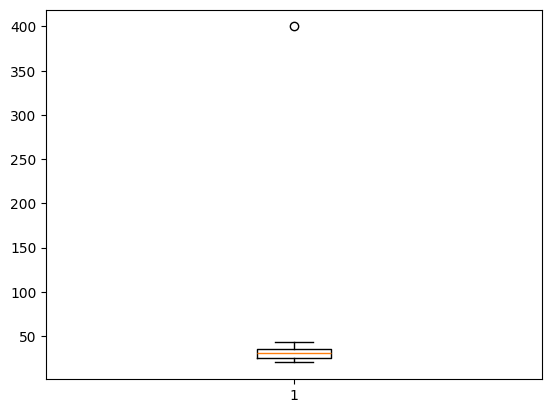

In [ ]:
plt.boxplot(lista_idades)

In [ ]:
#explicação gráfico:
#a linha laranja no meio da caixa trata-se da mediana,
#as bordas abaixo e acima da linha laranja são os quartis q1 e q3,
#a linha preta abaixo e a linha preta acima delimitam o limite inferior e superior,
#e o outlier é o circulo que está mais distante

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4271 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

{'whiskers': [<matplotlib.lines.Line2D at 0x7ebec1626bf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ebec16266b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ebec1626ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ebec1626170>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ebec1625ed0>],
 'means': []}

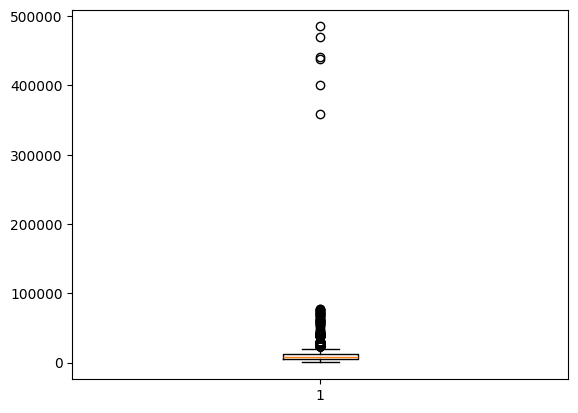

In [ ]:
#agora vamos analisar os salarios da nossa base de dados
plt.boxplot(df['SALARIO'])

In [ ]:
#calcuando os quartis
Q1=df['SALARIO'].quantile(0.25)
Q3=df['SALARIO'].quantile(0.75)
print (Q1)
print (Q3)

4751.5
11794.5


In [ ]:
#calculando o interquartil, que é o vaor que está entre o 1° e o 3° quartil
IQR=Q3-Q1
IQR

7043.0

In [ ]:
#delimitando os limites dos nossos dados
lim_superior=Q3+(1.5*IQR)
lim_superioe=Q1-(1.5*IQR)
print (lim_superior)
print (lim_superioe)

22359.0
-5813.0


In [ ]:
#entendo a faixa salarial da nossa base
df['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
de R$ 8.001/mês a R$ 12.000/mês,752
de R$ 4.001/mês a R$ 6.000/mês,584
de R$ 6.001/mês a R$ 8.000/mês,527
de R$ 12.001/mês a R$ 16.000/mês,437
de R$ 3.001/mês a R$ 4.000/mês,303
de R$ 2.001/mês a R$ 3.000/mês,285
de R$ 16.001/mês a R$ 20.000/mês,229
de R$ 1.001/mês a R$ 2.000/mês,216
de R$ 20.001/mês a R$ 25.000/mês,134


In [ ]:
#entendo melhor os dados
media_salario = df['SALARIO'].mean()
media_salario

10517.53348162023

In [ ]:
desvio_salario = df['SALARIO'].std()
desvio_salario

18096.210989118474

In [ ]:
#existem diversa tecnicas para localizar outliers de maneira acertiva. Como aqui podemos ver que existem salário bem acima da média, vamos calcular nossos limites em 3x o desvio padrão,
#para assim tentar adequar melhor os salários mais altos, sem que sejam enviesados
limite_superior=media_salario+(3*desvio_salario)
limite_superior

64806.16644897565

In [ ]:
#com o resultado do limite superior, vamos analisar se os salarios bem mais altos fazem realmente sentido, ou se houve erro no preenchimento

In [ ]:
#calculando a quantidade de salarios que estão acima do limite superior com base na faixa salarial
df[df['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19
de R$ 30.001/mês a R$ 40.000/mês,3


In [ ]:
#criando uma função para estabeler a média dos salarios entre 30 e 40k que estão abaixo do limite superior
media_30_40k=df[(df['FAIXA SALARIAL']=='de R$ 30.001/mês a R$ 40.000/mês') & (df['SALARIO']<limite_superior)]['SALARIO'].mean()

In [ ]:
#localizando e substituindo outliers
df.loc[(df['FAIXA SALARIAL']=='de R$ 30.001/mês a R$ 40.000/mês') & (df['SALARIO']>limite_superior), 'SALARIO'] = media_30_40k

In [ ]:
#verificando se houve realmente a substituição
df[df['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19


In [ ]:
#criando uma função para estabeler a média dos salarios acima de 40k que estão abaixo do limite superior
media_40k=df[(df['FAIXA SALARIAL']=='Acima de R$ 40.001/mês') & (df['SALARIO']<limite_superior)]['SALARIO'].mean()

In [ ]:
#localizando e substituindo outliers
df.loc[(df['FAIXA SALARIAL']=='Acima de R$ 40.001/mês') & (df['SALARIO']>limite_superior), 'SALARIO'] = media_40k

In [ ]:
#verificando se houve realmente a substituição
df[df['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


{'whiskers': [<matplotlib.lines.Line2D at 0x7ebec169bdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ebec160c850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ebec169bb50>],
 'medians': [<matplotlib.lines.Line2D at 0x7ebec160c310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ebec160c070>],
 'means': []}

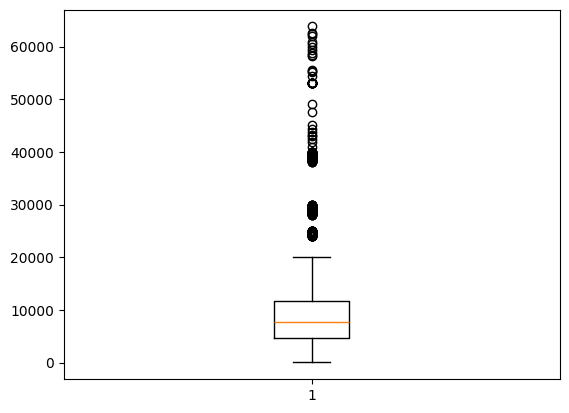

In [ ]:
#entendo o impacto das substituições no boxplot
plt.boxplot(df['SALARIO'])

In [ ]:
#A abordagem para lidar com os outliers deve ser escolhida com base na natureza dos dados, nos objetivos da análise e
#no contexto específico do problema. Não há uma solução única que seja
#adequada para todos os casos, e é importante avaliar as diferentes opções com cuidado.

**Distribuição amostral e intervalo de confiança**

In [ ]:
#importando as bibliotecas necessárias
from scipy import stats

In [ ]:
#criando uma variavel chamada salarios que contem todos os valores de salarios da nossa base
salarios = df['SALARIO']

In [ ]:
#criando uma variavel com a media amostral de todos os salarios
media_amostral =np.mean(salarios)
media_amostral

9904.390109813306

In [ ]:
#criando uma variavel com desvio padrão amostral de todos os salarios
desvio_amostral = np.std(salarios)
desvio_amostral

8306.104872579343

In [ ]:
#estabelecendo o nivel de confiança da amostra em 95%
nivel_confianca=0.95

In [ ]:
#estabelecendo o tamanho da amostra
tamanho_amostra=len(salarios)
tamanho_amostra

4271

In [ ]:
#calculando o erro padrão. Que trata-se da diferença entre os vários grupos amostrais, usaremos a função sem da biblioteca scipy.stats, que é uma função com vários
#métodos estatísticos. Usaremos essa função para dividir os grupos amostrais e calcular o erro padrão entre eles.
erro_padrao=stats.sem(salarios)
erro_padrao

127.11109872023638

In [ ]:
#calculando o nivel de intervalo de confinaça com a função stats.t.interval, e atrelado a alguns parametros, nivel_confianca, tamanho_amostra-1, loc=media_amostral, scale=erro_padrao
intervalo_confianca=stats.t.interval(nivel_confianca, tamanho_amostra-1, loc=media_amostral, scale=erro_padrao)
intervalo_confianca

(9655.186295869078, 10153.593923757535)

In [ ]:
#podemos concluir portanto, com um nível de confiana de 95%, que as pessoas que trabalham com dados no Brasil tem uma média salarial de 9.655,19 á 10.153,59. Isso
#significa que este valor trata-se de uma tendência central, ou a média, ou seja, também temos pessoas que ganham mais e menos que essa média, visto que estamos
#analisando niveis de senioridade distintos

In [ ]:
#adicionando uma nova tabela
df2=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Pt.2_Planilha_Aula.xlsx')

In [ ]:
df2

,ID,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,de 1 a 2 anos,de 7 a 10 anos,True,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL
1,zzls2oftfn9law393oezzls2ofhvfpzd,de 3 a 4 anos,Menos de 1 ano,False,Falta de oportunidade de crescimento no empreg...,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,de 3 a 4 anos,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,Não tenho experiência na área de dados,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,de 3 a 4 anos,de 7 a 10 anos,True,NaN,"Sim, fui aprovado e mudei de emprego",Não estou buscando e não pretendo mudar de emp...,"Remuneração/Salário, Benefícios, Flexibilidade...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,SQL
4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,"Ambiente e clima de trabalho, Plano de carreir...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia d

In [ ]:
#usando a função marge para juntar duas tabelas. lembrando que para que isso seja feito, é necessario que ambas as tabelas tenham uma coluna em comum.
#nesse caso será a coluna ID
df = df.merge(df2, on='ID', how='left')

In [ ]:
#verificando as colunas exixtentes na base
df.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua empresa atual?',
       'Qual o principal motivo da sua i

In [ ]:
#contando as variaveis de uma coluna especifica
df['Você pretende mudar de emprego nos próximos 6 meses?'].value_counts()

,count
Você pretende mudar de emprego nos próximos 6 meses?,
"Não estou buscando, mas me considero aberto a outras oportunidades",1354
Estou em busca de oportunidades dentro ou fora do Brasil,1011
Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses,978
"Estou em busca de oportunidades, mas apenas fora do Brasil",353


In [ ]:
#criando um filtro para uma das colunas novas advinda da junção, e criando uma função para criar uma nova coluna
df['EM_BUSCA']=df['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('em busca', case=False)

In [ ]:
df['EM_BUSCA'].value_counts()

,count
EM_BUSCA,
False,2332
True,1364


In [ ]:
#repetindo o processo para uma nova variavel
df['ABERTO_OPORT']=df['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('aberto', case=False)

In [ ]:
df['ABERTO_OPORT'].value_counts()

,count
ABERTO_OPORT,
False,2342
True,1354


In [ ]:
#realizando o desafio: crie uma nova coluna de Etnia - brancas, não branca e outras
#criando um filtro e uma função para criar uma nova coluna

In [ ]:
#visualizando as variaveis da coluna
df['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,2746
Parda,1054
Preta,291
Amarela,128
Prefiro não informar,26
Outra,17
Indígena,11


In [ ]:
#criando um filtro e uma função para uma nova coluna
df['ETNIA_BRANCA']=df['COR/RACA/ETNIA'].str.contains('Branca', case=False)

In [ ]:
df['ETNIA_BRANCA'].value_counts()

,count
ETNIA_BRANCA,
True,2746
False,1527


In [ ]:
df['ETNIA_NAO_BRANCA'] = df['COR/RACA/ETNIA'].str.contains('Parda|Preta|Amarela|Prefiro não informar|Indígena', case=False)

In [ ]:
df['ETNIA_NAO_BRANCA'].value_counts()

,count
ETNIA_NAO_BRANCA,
False,2763
True,1510


In [ ]:
df['ETNIA_OUTROS']=df['COR/RACA/ETNIA'].str.contains('Outra', case=False)

In [ ]:
df['ETNIA_OUTROS'].value_counts()

,count
ETNIA_OUTROS,
False,4256
True,17


**Correlação**

In [ ]:
#de forma resumida a correlação de pearson, demonstra que quando o valor for proximo a 1 á forte correlaão positiva, quanto duas variaveis crescem juntas
#já um valor proximo a -1 representa uma correlação negativa, ou seja, quando uma sob a outra variavels desce, e a ausência de correlação quando o valor
#é proximo a 0. para fazermos esse calculo na nossa base vamos utilizar a função corr

In [ ]:
correl_continua=df['IDADE'].corr(df['SALARIO'])
correl_continua

0.2902441968622099

In [ ]:
#calculando a correlação entre variaveis discretas(categoricas), para isso iremos utilizar o coeficiente de cramer que é basicamente a normalização de 0 a 1
#das variaveis, onde 0 indica nenhuma associação e 1 indica associação, para realizar este calculo vamos criar uma função
#def cramer_coef(coluna1, coluna2):

In [ ]:
#o primeiro passo para criar a função, é criar uma tabela cruzada que mostrara a frequencia com que uma determinada variavel se cruza com outra, faremos isso
#com a função crosstab, que irá criar uma tabela estruturada com cabeçalho e etc.
#tabela_cruzada=pd.crosstab(coluna1, coluna2)

In [ ]:
#porém a forma correta para utilizarmos ela na função seria em formato de array, que é uma tabela que consiste apenas em uma matriz, ou seja  que possui apenas
#numeros. para isso usaremos a seguinte função
#np.array(tabela_cruzada)

In [ ]:
#agra usaremos a biblioteca scipy.stats, e a função chi2_contingency, que nada mais é que o calculo do qui2°. essa função irá comparar a distribuição observada
#com as observações esperadas na tabela cruzada, considerando que as duas variaveis sejam independentes uma da outra. quanto maior a diferença entre a observação
#observada e esperada maior será o valor do qui2°, o que indica uma associação mais forte entre as variáveis.
#a função do qui2° é capaz de retornar diversos valores, porém estamos interessados apenas no 1°, sendo assim utilizarems o 0 para demonstrar isso
#chi2=chi2_contigency(tabela_cruzada)[0]

In [ ]:
#agora vamos calcular a soma de cada categoria da coluna nivel de ensino
#soma=np.sum(tabela_cruzada)

In [ ]:
#o próximo passo sera localizar o valor minimo da tabela -1, que é um calculo padrão
#mini=min(tab_cruzada.shape)-1

In [ ]:
#em seguida iremos calcular o coeficiente de cramer, que é a raiz quadrada do qui2 divida pela multiplicação da soma do valor minimo
#cramer=np.sqrt(chi2/(soma*mini))

In [ ]:
#finalizamos, agora vamos juntas todas as linhas de código
def cramer_coef(coluna1, coluna2):
  tabela_cruzada=pd.crosstab(coluna1, coluna2)
  tabela_cruzada=np.array(tabela_cruzada)
  chi2=chi2_contingency(tabela_cruzada)[0]
  soma=np.sum(tabela_cruzada)
  mini=min(tabela_cruzada.shape)-1
  cramer=np.sqrt(chi2/(soma*mini))
  return cramer

In [ ]:
cramer_coef(df['COR/RACA/ETNIA'], df['NIVEL DE ENSINO'])

0.04499106580480143

In [ ]:
#com o resultado podemos chegar a conclusão que cor e nivel de escolaridade não tem relação. vamos relembrar o conceito:'normalização
#de 0 a 1, onde 0 indica nenhuma associação e 1 indica associação'

In [ ]:
#Faça você mesmo: Faça a correlação entre nível de ensino e gênero

In [ ]:
def cramer_coef(coluna1, coluna2):
  tabela_cruzada=pd.crosstab(coluna1, coluna2)
  tabela_cruzada=np.array(tabela_cruzada)
  chi2=chi2_contingency(tabela_cruzada)[0]
  soma=np.sum(tabela_cruzada)
  mini=min(tabela_cruzada.shape)-1
  cramer=np.sqrt(chi2/(soma*mini))
  return cramer

In [ ]:
cramer_coef(df['GENERO'], df['NIVEL DE ENSINO'])

0.076119232802818

In [ ]:
#com o resultado podemos chegar a conclusão que genero e nivel de escolaridade não tem relação. vamos relembrar o conceito:'normalização
#de 0 a 1, onde 0 indica nenhuma associação e 1 indica associação'

In [ ]:
#salvando o arquivo em csv
#usa-se index=False, para que ao salvar não se crie mais uma coluna com os numeros de indez da tabela
df.to_csv('/content/drive/MyDrive/Colab Notebooks/PROGRAMARIA/analise_dados.csv', index=False)